# Live shapper tutorial

It is a live tutorial of the [shapper R package](https://github.com/ModelOriented/shapper). You can edit each chunk and re-run them (Ctrl+Enter).

# Classification
## Load datasets

In [1]:
library("DALEX2")
Y_train <- HR$status
x_train <- HR[ , -6]
head(HR)

Welcome to DALEX2 (version: 0.9).


gender,age,hours,evaluation,salary,status
male,32.58267,41.88626,3,1,fired
female,41.21104,36.34339,2,5,fired
male,37.70516,36.81718,3,0,fired
female,30.06051,38.96032,3,2,fired
male,21.10283,62.15464,5,3,promoted
male,40.11812,69.53973,2,0,fired


## Let's build model

In [2]:
library("randomForest")
set.seed(123)
model_rf <- randomForest(x = x_train, y = Y_train)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


## Here shapper starts

In [3]:
library(shapper)

p_function <- function(model, data) predict(model, newdata = data, type = "prob")

ive_rf <- individual_variable_effect(model_rf, data = x_train, predict_function = p_function,
            new_observation = x_train[1:2,], nsamples = 50)

print(ive_rf)

    gender      age    hours evaluation salary _id_ _ylevel_ _yhat_ _yhat_mean_
1     male 32.58267 41.88626          3      1    1    fired  0.854   0.3755216
1.3   male 32.58267 41.88626          3      1    1    fired  0.854   0.3755216
1.4   male 32.58267 41.88626          3      1    1    fired  0.854   0.3755216
1.5   male 32.58267 41.88626          3      1    1    fired  0.854   0.3755216
1.6   male 32.58267 41.88626          3      1    1    fired  0.854   0.3755216
1.1   male 32.58267 41.88626          3      1    1       ok  0.144   0.2758111
       _vname_ _attribution_ _sign_      _label_
1       gender   -0.03312199      - randomForest
1.3        age    0.02135603      + randomForest
1.4      hours    0.30846492      + randomForest
1.5 evaluation    0.11945970      + randomForest
1.6     salary    0.06231975      + randomForest
1.1     gender    0.02735491      + randomForest


## Plotting

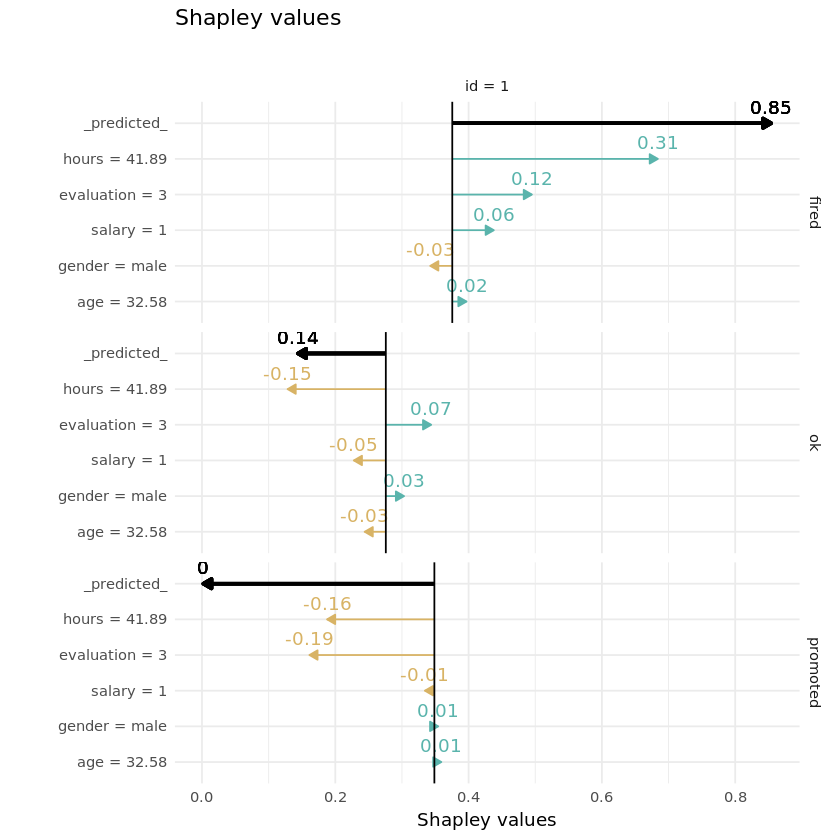

In [4]:
plot(ive_rf)

# Regression
## Data sets

In [5]:
Y_train <- dragons$life_length
x_train <- dragons[ , -8]

head(dragons)

year_of_birth,height,weight,scars,colour,year_of_discovery,number_of_lost_teeth,life_length
-1291,59.40365,15.32391,7,red,1700,25,1368.4331
1589,46.21374,11.80819,5,red,1700,28,1377.0474
1528,49.17233,13.34482,6,red,1700,38,1603.9632
1645,48.29177,13.27427,5,green,1700,33,1434.4222
-8,49.99679,13.08757,1,red,1700,18,985.4905
915,45.40876,11.48717,2,red,1700,20,969.5682


## Let's fit models

In [6]:
set.seed(123)
model_rf <- randomForest(x = x_train, y = Y_train)

## Use shapper

In [7]:
ive_rf <- individual_variable_effect(model_rf, data = x_train,
                                     new_observation = x_train[1,])

## Plot results

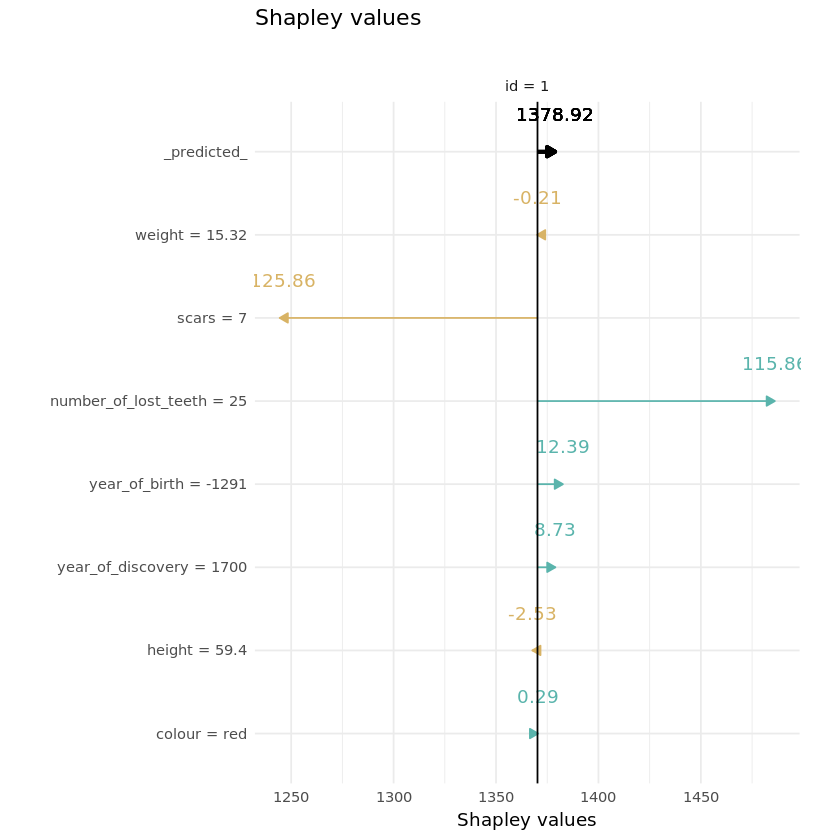

In [8]:
plot(ive_rf)